# Import

In [3]:
# expt variables
channel=creb.CHANNEL
label=creb.IMAGING_LABEL
group_labels=creb.labels

# set seaborn pallette

sns.set_style("white")
sns.set_style("ticks")
sns.set_context("talk")

colors = creb.colors
sns.set_palette(colors)

# stats
%load_ext rpy2.ipython

In [4]:
# notebook imports 
import lab.figures.place_cell_figures as pcf
from copy import deepcopy
from scipy.stats import pearsonr

In [5]:
# variables + functions
activity_labels =  {'pop_vector': 'Population vector correlation',
                    'pf_correlation': 'Place field correlation',
                    'recurrence': 'Recurrence probablity',
                    'centroid_shift':'Centroid shift (cm of belt)'} 

# 2.3 notebook functions 
def just_day(df,shuffle=False):
    df_day = df[df.pairing =='day']
    if shuffle:
        return rm_shuffle(df_day), just_shuffle(df_day)
    else: 
        return rm_shuffle(df_day)

def just_session(df,shuffle=False):
    df_sess = df[df.pairing =='session']
    if shuffle:
        return rm_shuffle(df_sess), just_shuffle(df_sess)
    else: 
        return rm_shuffle(df_sess)

def rm_shuffle(df):
    return df[(df.grp !='shuffle')]

def just_shuffle(df):
    return df[(df.grp =='shuffle')]

def add_same_diff_cols_old(df):
    i_s = df.loc[df["day"].isin(['1','2','3','5','6'])].index
    i_d = df.loc[df["day"] == '4' ].index

    #df.loc[i_s,"reward_loc"] = 'Same'
    df.loc[i_d,"reward_loc"] = 'Different'
    df.loc[i_s,"reward_loc"] = 'Same'
    print(df.groupby(["day","reward_loc"]).count())
    return df


def add_same_diff_cols(df):
    df.loc[df.query("day in ['1','2','3','5','6']").index,"reward_loc"] = 'Different'
    df.loc[df.query("day == '4'").index,"reward_loc"] = 'Same'
    return df

def calc_day_diff(df_mid):
    df3=df_mid.groupby("day").get_group('3')
    df4=df_mid.groupby("day").get_group('4')
    dfm=pd.merge(df3,df4,on=["mouseID","session"])
    dfm["diff"]=dfm.value_x-dfm.value_y
    dfm.rename(columns={'grp_x':'grp'},inplace=True)
    
    return dfm


def add_mouse_kind(df):
    """Puts mouse type for CREB exp in df"""

    nmap = {'mjd503':"CaMKII mouse",
            'mjd500':"CaMKII mouse",
            'mjd511':"CaMKII mouse",
            'mjd535':"AAV CaMKII",
            'mjd537':"AAV CaMKII",
            'mjd016':"AL lab",        
            'mjd017':"AL lab",
            'mjd529':"AAV CaMKII",
            'mjd532':"AAV CaMKII",
            'mjd533':"AAV CaMKII",
            'mjd534':"AAV CaMKII",
            'mjd012':"AL lab",
            'mjd505':"CaMKII mouse",
            'mjd527':"AAV CaMKII",
            'mjd528':"AAV CaMKII",
            'mjd526':"AAV CaMKII"}

    df["mouse_kind"] = df.mouseID.apply(lambda x: nmap[x] )
    
    
    return df

# Load Groups

See stability ntoebook for genererating the stability and general dfs, and merging them

# Read CSV

In [6]:
df_merge = pd.read_csv('big-df-by-expt-with-stab.csv')
# df.drop(df.query('trial_id == 12813') # this already removed from DF

# Stability

In [7]:
stab_vars= ["pop_vector",
            "recurrence",
            "centroid_shift",
            "pf_correlation"]

## day paired - overall

In [29]:
for key in stab_vars:

    print("\n" + key)
    # pearson correlation
    for n,g in just_day(df_merge).groupby("grp"):
        r,p = pearsonr(g["anticipatory_licking"],g[key])
        print("{}: {},{}".format(n,round(r,4),round(p,4)))


pop_vector
CREB: 0.1622,0.1505
Control: 0.1799,0.1422
dn-CREB: -0.0016,0.9899

recurrence
CREB: -0.0939,0.4072
Control: -0.0457,0.7115
dn-CREB: -0.1137,0.3749

centroid_shift
CREB: -0.1374,0.2243
Control: -0.3497,0.0035
dn-CREB: -0.1054,0.4108

pf_correlation
CREB: 0.1762,0.1179
Control: 0.2397,0.049
dn-CREB: 0.1154,0.3677


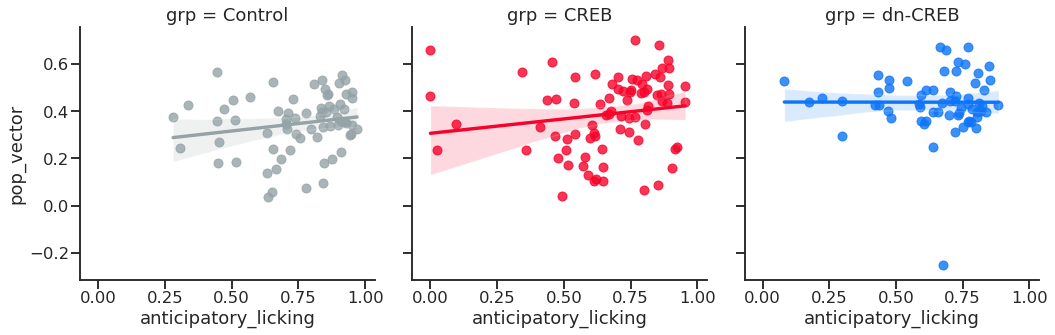

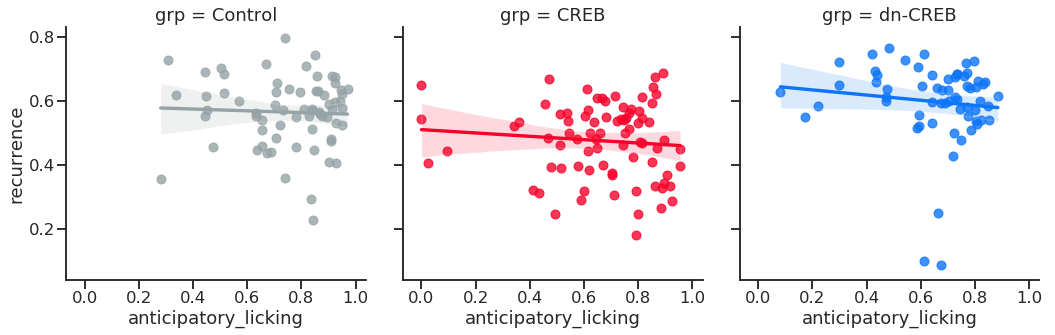

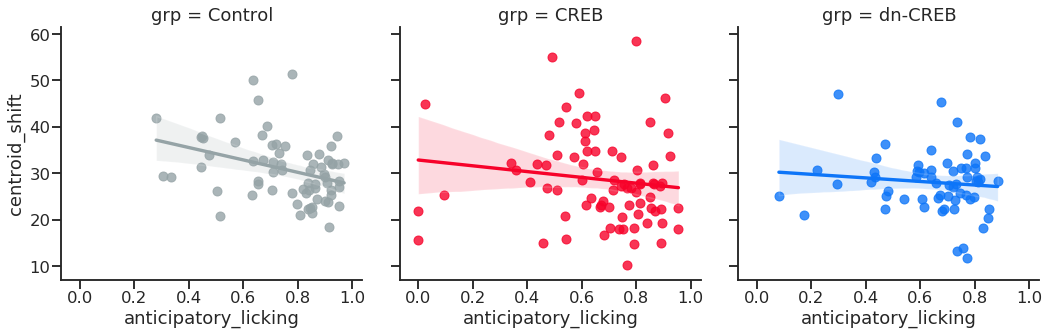

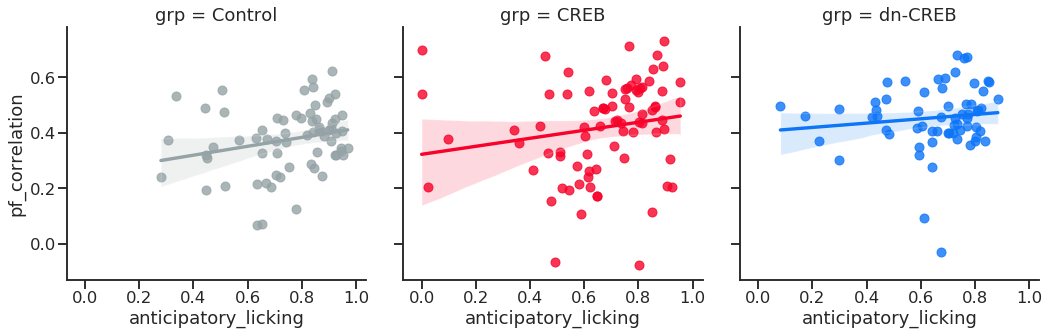

In [28]:


    sns.lmplot(x='anticipatory_licking',y=key,col='grp',hue='grp',data=just_day(df_merge),truncate=True)

## day paired - by condition

In [30]:
# by condition

for key in stab_vars:

    print("\n" + key)
    # pearson correlation
    for n,g in just_day(df_merge).groupby("grp"):

        for n2,c in g.groupby('condition'):
            r,p = pearsonr(c["anticipatory_licking"],c[key])
            print(n)
            print("{}: {},{}".format(n2,round(r,4),round(p,4)))


pop_vector
CREB
1: 0.3261,0.0523
CREB
2: 0.295,0.0519
Control
1: 0.4989,0.0081
Control
2: 0.2277,0.1521
dn-CREB
1: 0.0157,0.9435
dn-CREB
2: 0.0819,0.6153

recurrence
CREB
1: 0.0193,0.9111
CREB
2: -0.092,0.5527
Control
1: 0.2279,0.253
Control
2: -0.084,0.6018
dn-CREB
1: 0.2495,0.2509
dn-CREB
2: -0.1137,0.4847

centroid_shift
CREB
1: -0.2612,0.1239
CREB
2: -0.3035,0.0452
Control
1: -0.5582,0.0025
Control
2: -0.4525,0.003
dn-CREB
1: 0.1605,0.4644
dn-CREB
2: -0.2704,0.0915

pf_correlation
CREB
1: 0.351,0.0358
CREB
2: 0.3562,0.0176
Control
1: 0.5627,0.0022
Control
2: 0.2981,0.0583
dn-CREB
1: 0.1468,0.504
dn-CREB
2: 0.217,0.1787


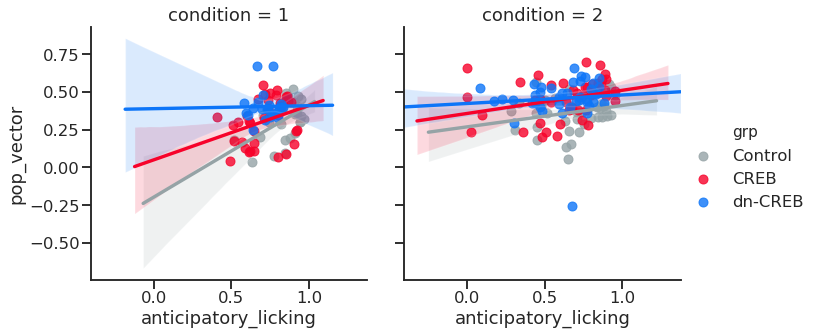

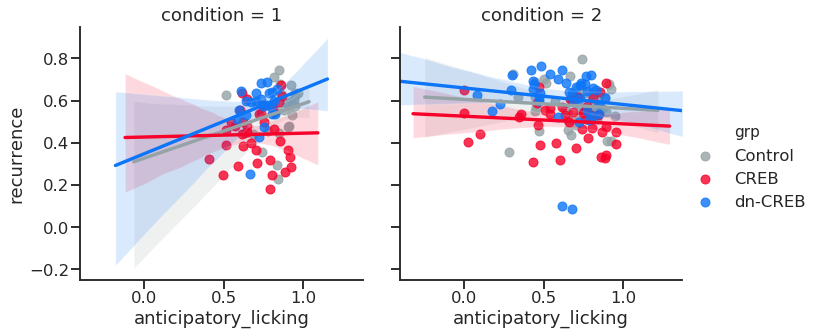

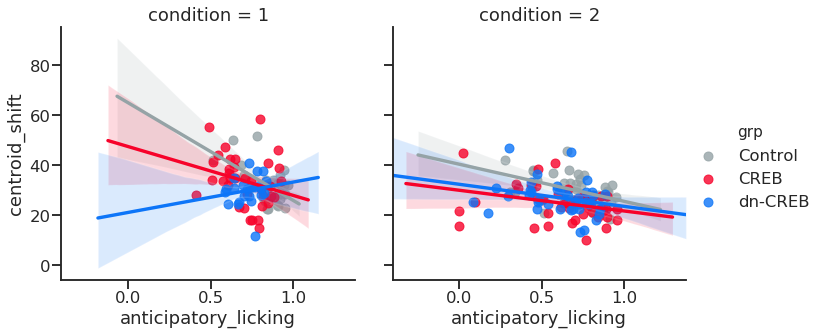

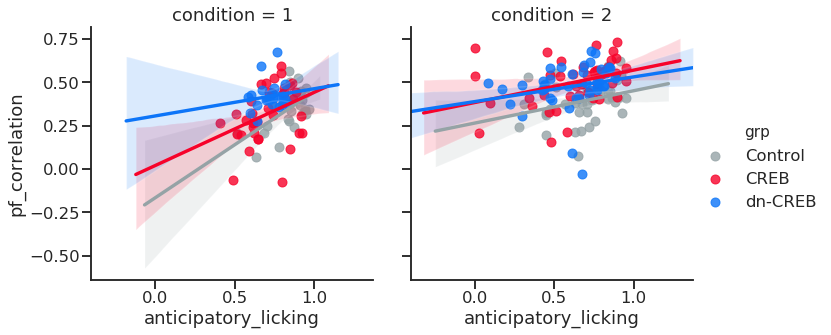

In [32]:
for key in stab_vars:

    sns.lmplot(x='anticipatory_licking',y=key,col='condition',hue='grp',data=just_day(df_merge))

## session paired - overall

In [34]:
for key in stab_vars:

    print("\n" + key)
    # pearson correlation
    for n,g in just_session(df_merge).groupby("grp"):
        r,p = pearsonr(g["anticipatory_licking"],g[key])
        print("{}: {},{}".format(n,round(r,4),round(p,4)))


pop_vector
CREB: 0.3071,0.0031
Control: 0.4389,0.0001
dn-CREB: 0.3207,0.0072

recurrence
CREB: 0.1705,0.1062
Control: 0.1686,0.1401
dn-CREB: -0.0975,0.4255

centroid_shift
CREB: -0.1939,0.0655
Control: -0.6141,0.0
dn-CREB: -0.3931,0.0008

pf_correlation
CREB: 0.277,0.0079
Control: 0.4996,0.0
dn-CREB: 0.364,0.0021


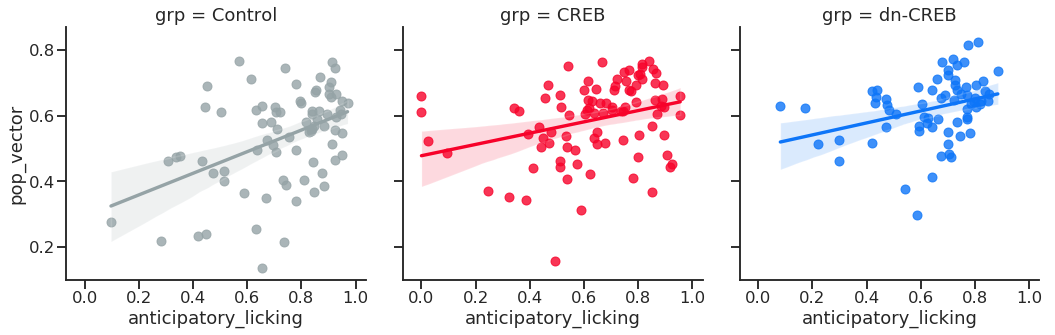

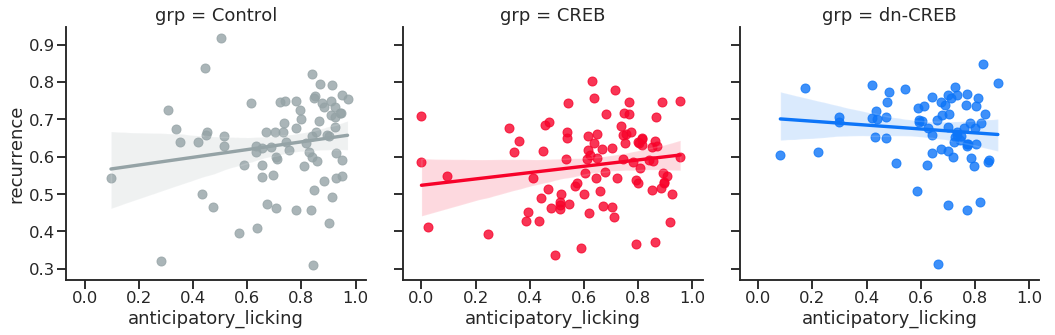

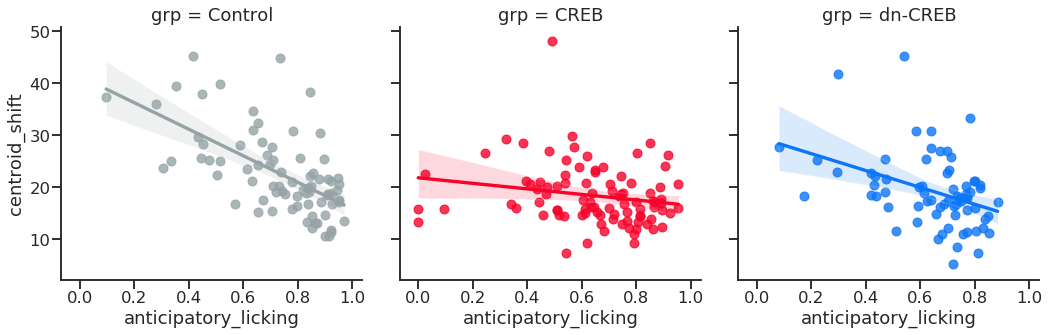

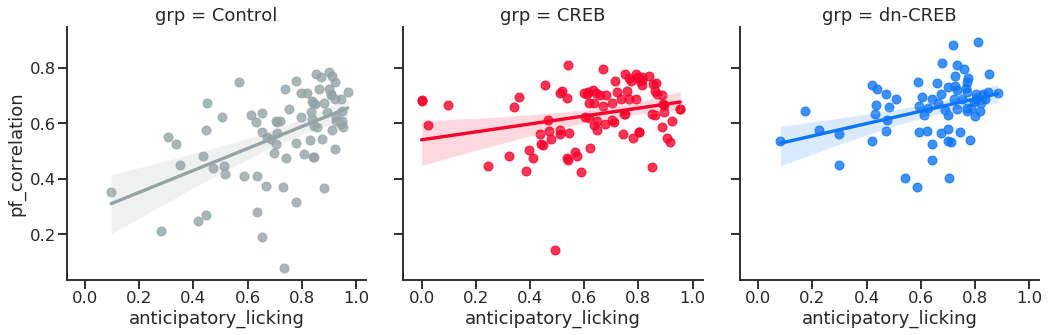

In [35]:
for key in stab_vars:

    sns.lmplot(x='anticipatory_licking',y=key,col='grp',hue='grp',data=just_session(df_merge),truncate=True)

## session paired - by condition

In [36]:
# by condition

for key in stab_vars:

    print("\n" + key)
    # pearson correlation
    for n,g in just_session(df_merge).groupby("grp"):

        for n2,c in g.groupby('condition'):
            r,p = pearsonr(c["anticipatory_licking"],c[key])
            print(n)
            print("{}: {},{}".format(n2,round(r,4),round(p,4)))


pop_vector
CREB
1: 0.3983,0.005
CREB
2: 0.3325,0.0293
Control
1: 0.528,0.0009
Control
2: 0.4513,0.0027
dn-CREB
1: 0.4199,0.0187
dn-CREB
2: 0.5285,0.0006

recurrence
CREB
1: 0.2175,0.1376
CREB
2: 0.1698,0.2764
Control
1: 0.2517,0.1387
Control
2: 0.1555,0.3255
dn-CREB
1: 0.1067,0.5679
dn-CREB
2: -0.0622,0.7105

centroid_shift
CREB
1: -0.3273,0.0232
CREB
2: -0.1318,0.3996
Control
1: -0.6937,0.0
Control
2: -0.7041,0.0
dn-CREB
1: -0.1692,0.363
dn-CREB
2: -0.5568,0.0003

pf_correlation
CREB
1: 0.444,0.0016
CREB
2: 0.2297,0.1385
Control
1: 0.5605,0.0004
Control
2: 0.5674,0.0001
dn-CREB
1: 0.3361,0.0645
dn-CREB
2: 0.6057,0.0001


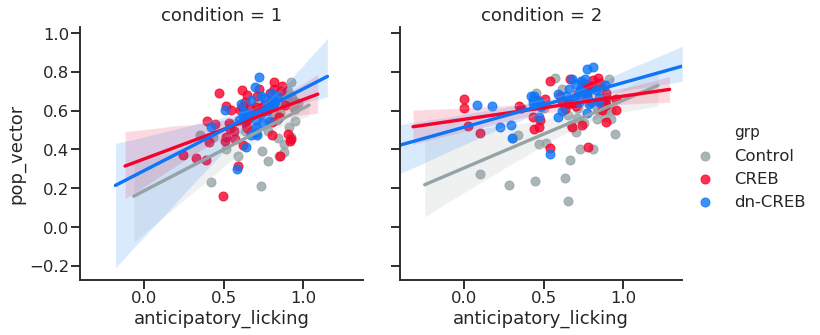

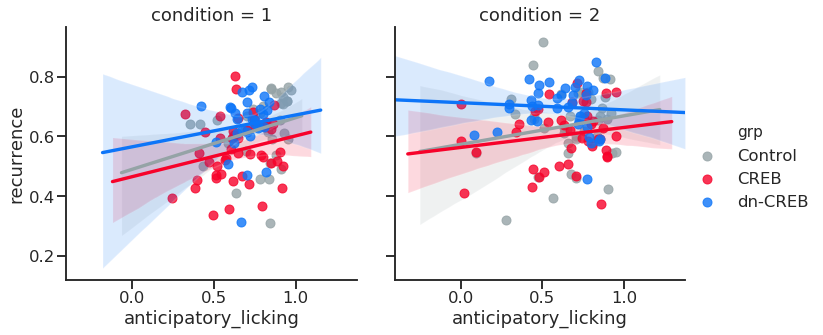

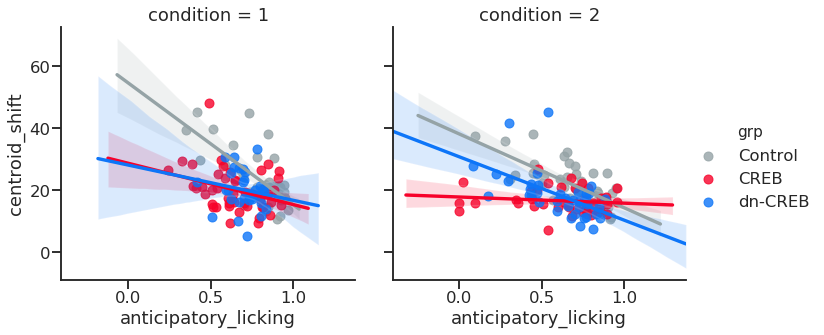

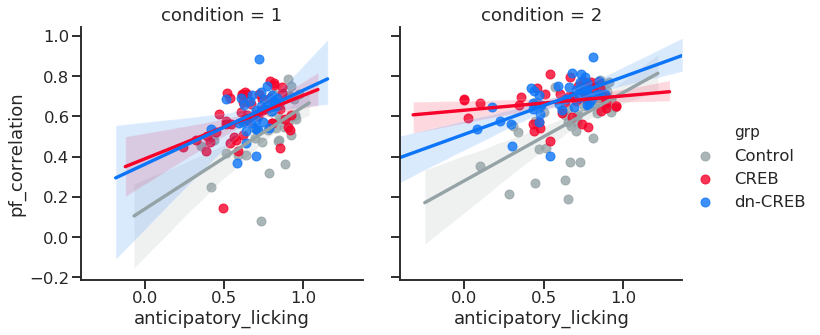

In [37]:
for key in stab_vars:

    sns.lmplot(x='anticipatory_licking',y=key,col='condition',hue='grp',data=just_session(df_merge))

# pf properties

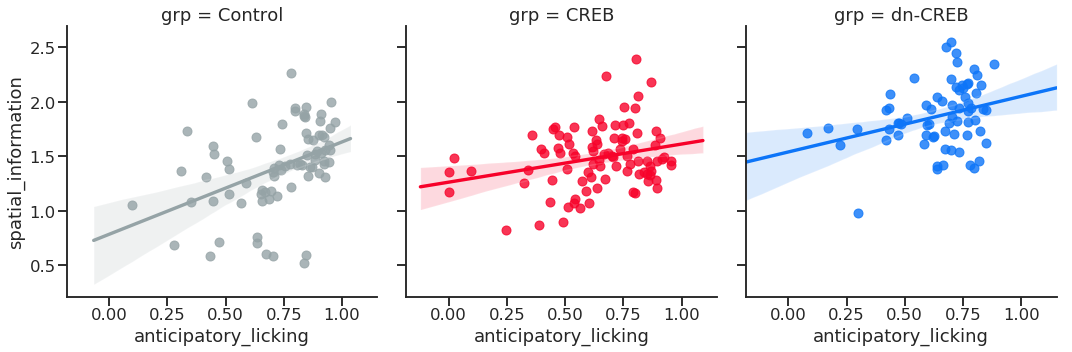

In [160]:
sns.lmplot(x='anticipatory_licking',y='spatial_information',col='grp',hue='grp',data=just_session(df_merge))

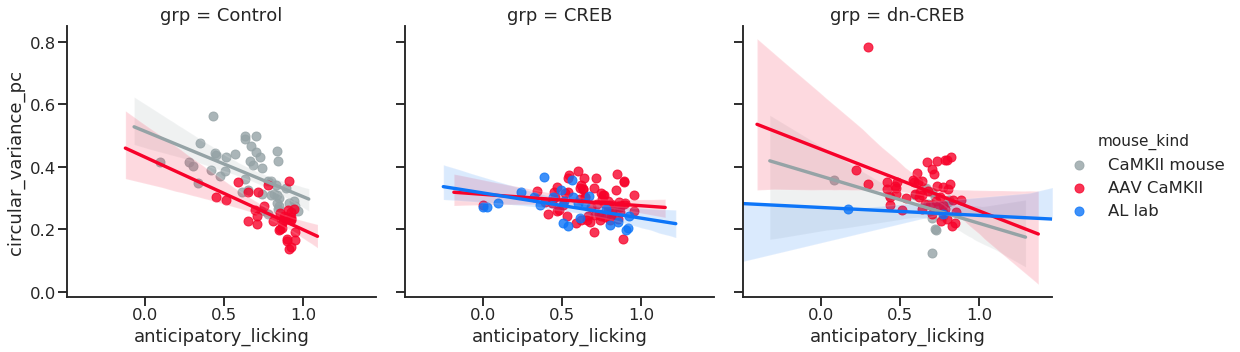

In [169]:
sns.lmplot(x='anticipatory_licking',y='circular_variance_pc',col='grp',hue='mouse_kind',data=just_session(df_merge))

# Reward

In [11]:
rvars = ["fraction_near_rads_8",
"fraction_near_norm_05",
"fraction_near_norm_10",
"activity_centroid_reward_distance",
"centroid_reward_distance"]

In [12]:
from scipy.stats import spearmanr, pearsonr, linregress

## overall

CREB: -0.35,0.0
Control: -0.42,0.0
dn-CREB: -0.14,0.24


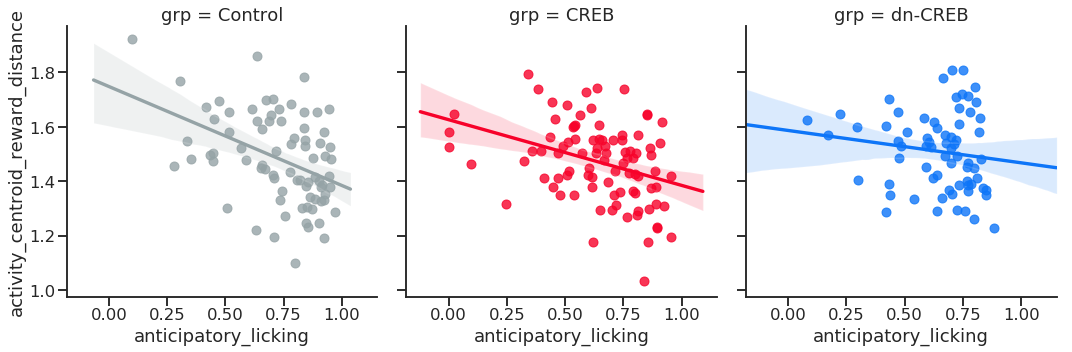

In [14]:
key="activity_centroid_reward_distance"

sns.lmplot(x='anticipatory_licking',y=key,col='grp',hue='grp',data=just_session(df_merge))

# stats for one key
for n,g in just_session(df_merge).groupby("grp"):
    r,p = pearsonr(g["anticipatory_licking"],g[key])
    print("{}: {},{}".format(n,round(r,2),round(p,2)))
          

## by condition

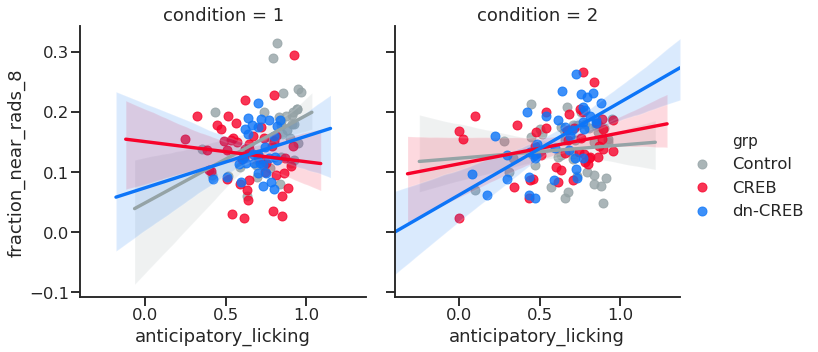

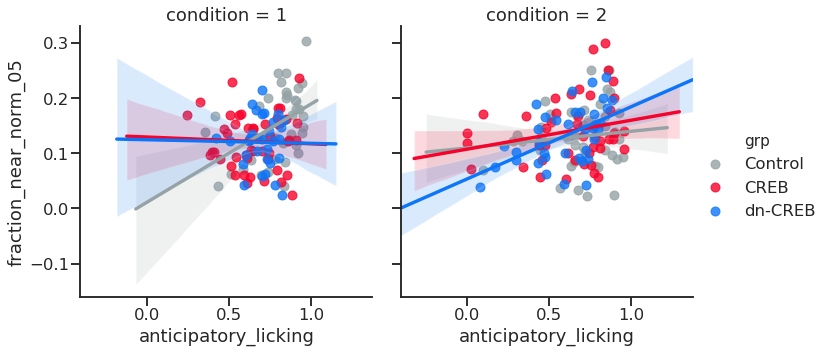

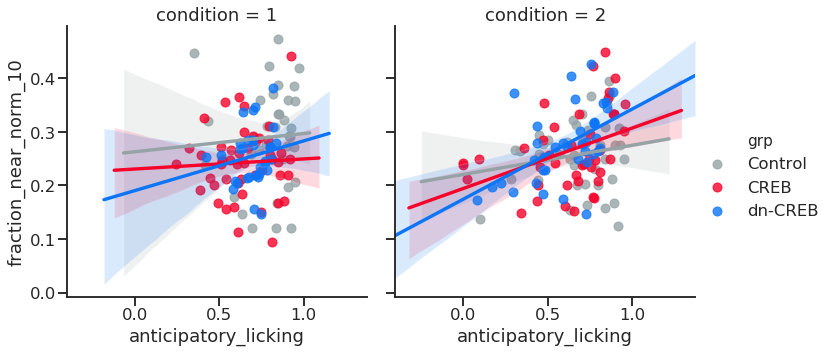

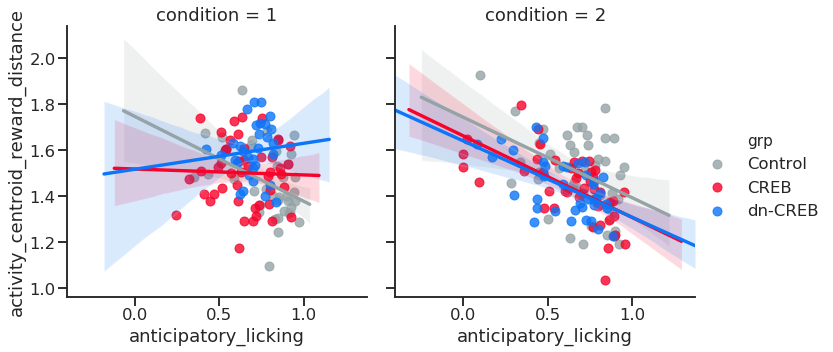

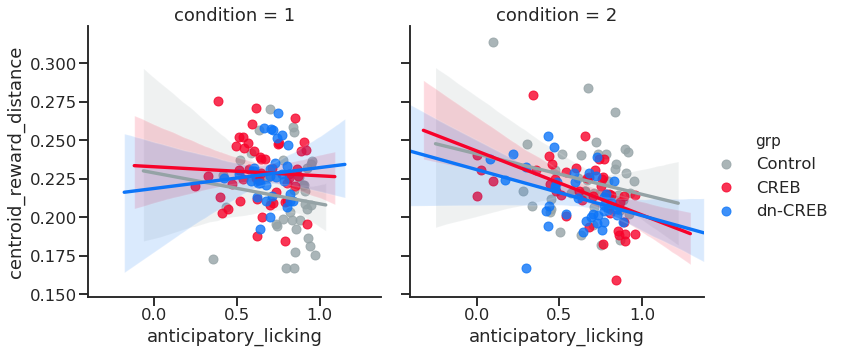

In [200]:
for key in rvars:

    sns.lmplot(x='anticipatory_licking',y=key,col='condition',hue='grp',data=just_session(df_merge))

### fraction near

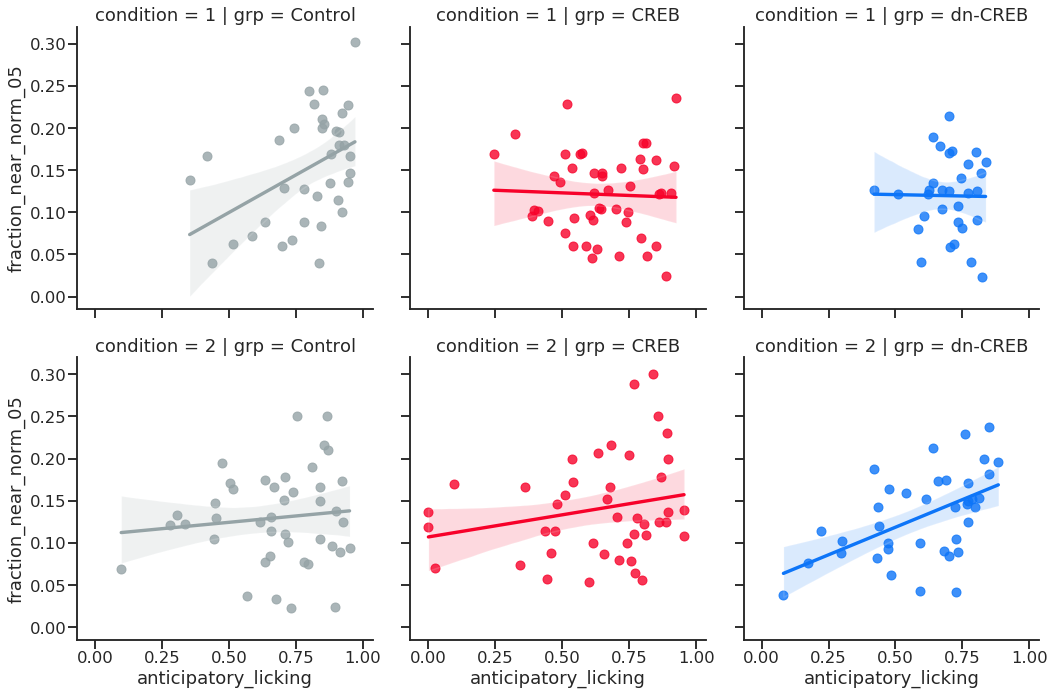

In [44]:
g = sns.lmplot(x='anticipatory_licking',y='fraction_near_norm_05',col='grp',row="condition",hue='grp',data=just_session(df_merge),truncate=True,n_boot=10000)
g.savefig('figs/F15-reward-fract-near-corr.svg')

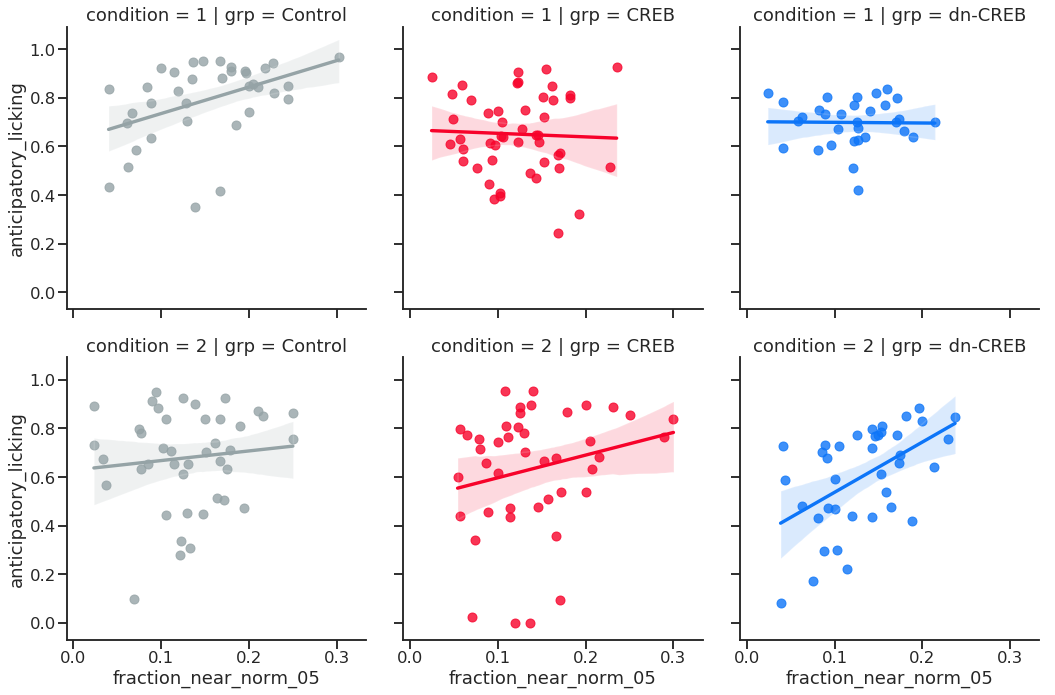

In [32]:
# adjust ylim to show top row better
g = sns.lmplot(y='anticipatory_licking',x='fraction_near_norm_05',col='grp',row="condition",hue='grp',data=just_session(df_merge),truncate=True)
#g.set(ylim=[.3,1])

In [18]:
# by condition

key = "fraction_near_norm_05"

print("\n" + key)
# pearson correlation
for n,g in just_session(df_merge).groupby("grp"):
    
    for n2,c in g.groupby('condition'):
        r,p = pearsonr(c["anticipatory_licking"],c[key])
        print(n)
        print("{}: {},{}".format(n2,round(r,4),round(p,4)))


fraction_near_norm_05
CREB
1: -0.0425,0.7744
CREB
2: 0.221,0.1544
Control
1: 0.4405,0.0072
Control
2: 0.1093,0.4906
dn-CREB
1: -0.0135,0.9427
dn-CREB
2: 0.5199,0.0008


### activity centroid

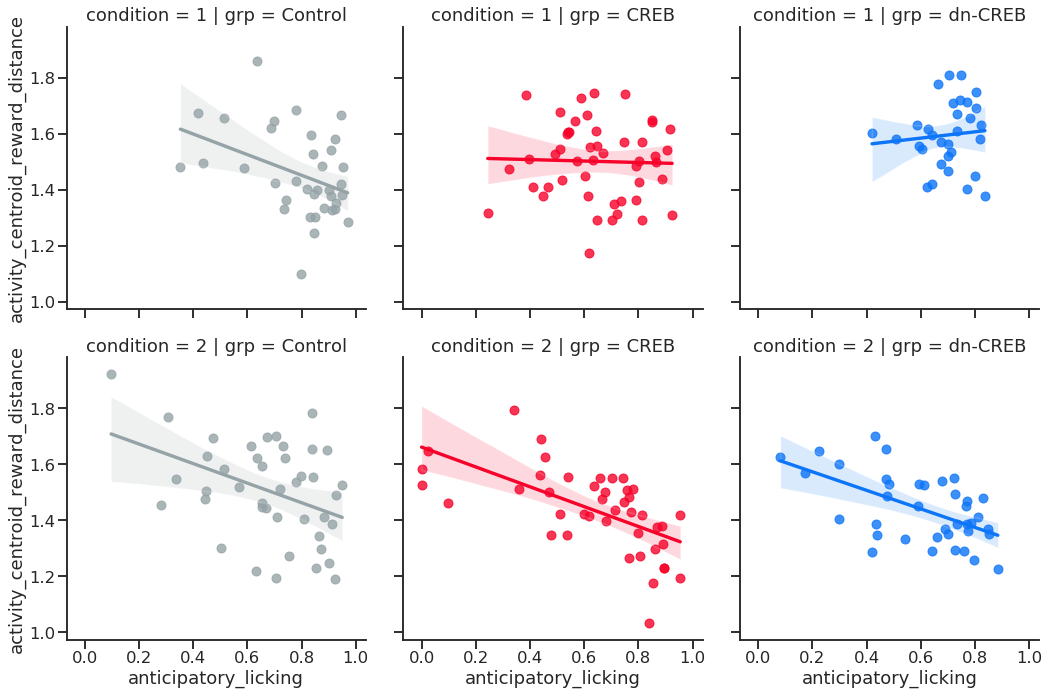

In [41]:
g = sns.lmplot(x='anticipatory_licking',y='activity_centroid_reward_distance',col='grp',row="condition",hue='grp',data=just_session(df_merge),truncate=True,n_boot=10000)
g.savefig('figs/F16-reward-act-centroid.svg')

In [201]:
# overall 
key = "activity_centroid_reward_distance"

print("\n" + key)
# pearson correlation
for n,g in just_session(df_merge).groupby("grp"):
    r,p = pearsonr(g["anticipatory_licking"],g[key])
    print("{}: {},{}".format(n,round(r,4),round(p,4)))


activity_centroid_reward_distance
CREB: -0.3521,0.0006
Control: -0.421,0.0001
dn-CREB: -0.1429,0.2416


In [204]:
# by condition

key = "activity_centroid_reward_distance"

print("\n" + key)
# pearson correlation
for n,g in just_session(df_merge).groupby("grp"):
    
    for n2,c in g.groupby('condition'):
        r,p = pearsonr(c["anticipatory_licking"],c[key])
        print(n)
        print("{}: {},{}".format(n2,round(r,4),round(p,4)))


activity_centroid_reward_distance
CREB
1: -0.031,0.8342
CREB
2: -0.6125,0.0
Control
1: -0.3874,0.0196
Control
2: -0.4052,0.0078
dn-CREB
1: 0.09,0.6302
dn-CREB
2: -0.563,0.0002
